<div>
    <h2> Theory for linear regression approach </h2>
<img src="img/multivariate-theory1.jpeg" alt="Drawing" style="height: 500px;"/>
<img src="img/multivariate-theory2.jpeg" alt="Drawing" style="height: 500px;"/>
</div>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Step 1 - Data Generation

In [2]:
n = 10
X, y = make_regression(n_features=n, n_samples=500, noise=25, random_state=0)
print(X.shape, y.shape)

(500, 10) (500,)


In [3]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
1,0.967446,-1.226622,-0.817493,-1.401347,-0.263937,-0.055353,1.030438,0.352817,-0.152774,-2.047324
2,0.802456,-0.268003,1.867559,0.906045,-0.155010,0.947252,-0.861226,0.614079,0.922207,1.910065
3,-0.977278,1.867558,1.764052,0.400157,-0.151357,0.950088,0.978738,-0.103219,0.410599,2.240893
4,-0.171546,0.523277,-1.292857,0.267051,0.823504,0.771791,-0.039283,2.163236,1.336528,-1.168093


In [4]:
pd.DataFrame(y).head()

,0
0,-34.764892
1,-170.197097
2,150.422762
3,292.447518
4,208.492899


## Step 2 - Normalization

In [5]:
print(f"Mean before normalization - {X.mean(axis=0)}")
print(f"Std before normalization - {X.std(axis=0)}")

Mean before normalization - [-0.02995589 -0.07127637 -0.09357268  0.04844928 -0.03183627  0.01762592
 -0.0091391   0.00855508  0.06286967 -0.04898012]
Std before normalization - [0.98390394 1.00209533 0.99304481 0.95362204 1.01860381 0.91807952
 0.99277996 1.02029591 0.96972094 0.98536712]


In [6]:
def normalize(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - u)/std
X = normalize(X)
print(f"Mean after normalization - {X.mean(axis=0)}")
print(f"Std after normalization - {X.std(axis=0)}")

Mean after normalization - [-1.24344979e-17 -4.39648318e-17 -1.28785871e-17 -2.44249065e-17
  3.77475828e-18 -3.87467836e-17  3.31401573e-17 -1.64313008e-17
  5.46229728e-17 -9.17044218e-17]
Std after normalization - [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Step 3 - Visualization

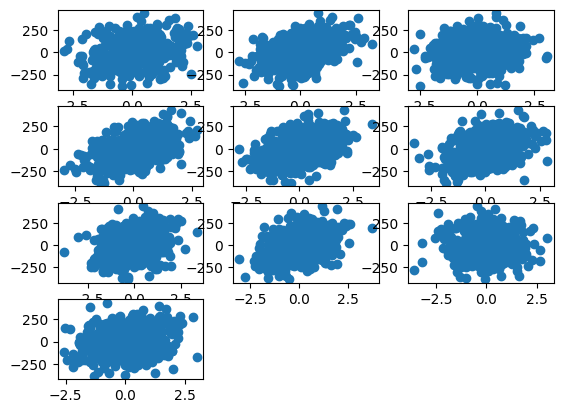

In [7]:
# visualizing y against each individual feature
for i in range(10):
    plt.subplot(4,3,i+1)
    plt.scatter(X[:,i],y)
plt.show()

## Step 4 pre-processing data - adding a dummy column for simpler calculations

In [8]:
def add_dummy_column(X):
    if X.shape[1] == (n+1):
        return X
    else:
        X0 = np.ones((X.shape[0],1))
        return np.hstack((X0, X))
print(f"Shape of X before pre-processing - {X.shape}")
X = add_dummy_column(X)
print(f"Shape of X after pre-processing - {X.shape}")

Shape of X before pre-processing - (500, 10)
Shape of X after pre-processing - (500, 11)


In [9]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
1,1.0,1.013719,-1.152930,-0.728991,-1.520305,-0.227862,-0.079490,1.047138,0.337413,-0.222377,-2.028019
2,1.0,0.846030,-0.196316,1.974867,0.899303,-0.120924,1.012577,-0.858283,0.593479,0.886169,1.988137
3,1.0,-0.962820,1.934780,1.870636,0.368813,-0.117338,1.015666,0.995061,-0.109551,0.358586,2.323878
4,1.0,-0.143907,0.593310,-1.207684,0.229233,0.839718,0.821459,-0.030363,2.111820,1.313428,-1.135732


## Step 5 Train test split

In [10]:
XT, Xt, yT, yt = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)
print(f"Train size X - {XT.shape} y - {yT.shape}")
print(f"Test size X - {Xt.shape} y - {yt.shape}")

Train size X - (350, 11) y - (350,)
Test size X - (150, 11) y - (150,)


## Step 6 Model training

In [11]:
def hypothesis(X, theta):
    return np.dot(X, theta)


def error(X, theta, y):
    yp = hypothesis(X, theta)
    return np.mean((yp-y)**2)


def gradient(X, theta, y):
    yp = hypothesis(X, theta)
    grad = np.dot(X.T, (yp-y))
    m = X.shape[0]
    return grad/m


def train(X, y, learning_rate=0.1, max_iters=100):
    n = X.shape[1]
    theta = np.random.randn(n)
    error_list = []

    for i in range(max_iters):
        e = error(X, theta, y)
        grad = gradient(X, theta, y)
        theta = theta - learning_rate*grad
        error_list.append(e)
    return theta, error_list

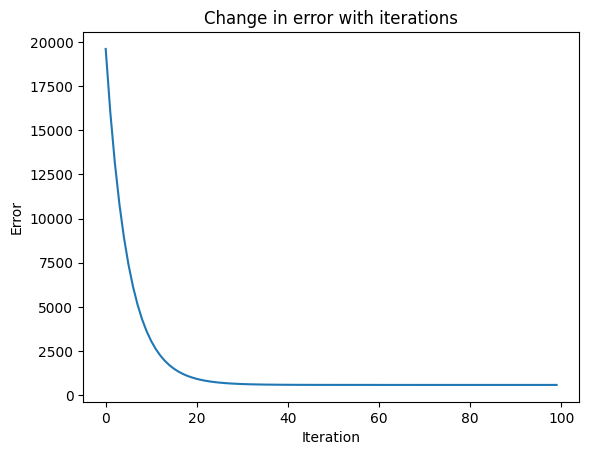

In [12]:
theta, error_list = train(XT, yT)

# plotting error wrt iterations
plt.plot(error_list)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Change in error with iterations')
plt.show()

In [13]:
def r2_score(y, yp):
    ymean = y.mean()
    num = np.sum((yp-y)**2)
    denom = np.sum((ymean-y)**2)
    return 1-(num/denom)
yp = hypothesis(Xt, theta)
print(f"R2 score of the model is {r2_score(yt, yp)}")

R2 score of the model is 0.9700364882633491


## Linear regression with sk-learn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(XT, yT)

LinearRegression()

In [16]:
model.score(Xt,yt)

0.9700375976008606

In [17]:
model.coef_

array([ 0.        , 29.20131565, 59.49944086, 11.77822889, 63.3403357 ,
       55.92153791, 48.36476149, 41.46247247, 56.48207272,  3.08251767,
       26.1276896 ])

In [18]:
model.intercept_

np.float64(-6.865910732789315)